# Description

Описание атрибутов(ga_hits.csv):
- session_id — ID визита;
- client_id — ID посетителя;
- visit_date — дата визита;
- visit_time — время визита;
- visit_number — порядковый номер визита клиента;
- utm_source — канал привлечения;
- utm_medium — тип привлечения;
- utm_campaign — рекламная кампания;
- utm_keyword — ключевое слово;
- device_category — тип устройства;
- device_os — ОС устройства;
- device_brand — марка устройства;
- device_model — модель устройства;
- device_screen_resolution — разрешение экрана;
- device_brand — марка устройства;
- device_model — модель устройства;
- device_screen_resolution — разрешение экрана;
- device_browser — браузер;
- geo_country — страна;
- geo_city — город

Описание атрибутов(ga_sessions.csv):
- session_id — ID визита;
- hit_date — дата события;
- hit_time — время события;
- hit_number — порядковый номер события в рамках сессии;
- hit_type — тип события;
- hit_referer — источник события;
- hit_page_path — страница события;
- event_category — тип действия;
- event_action — действие;
- event_label — тег действия;
- event_value — значение результата действия
<hr>

**Целевые действия:**  
события типа ga_hits.event_action in
('sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click')

**Реклама в социальных сетях:**  
все визиты с ga_sessions.utm_source in
('QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw',
'gVRrcxiDQubJiljoTbGm').

**Органический трафик:**  
все визиты с ga_sessions.utm_medium in ('organic',
'referral', '(none)').

**Платный трафик:**  
весь неорганический трафик.

# Targets

#### - Проведите проверку следующих гипотез:
1. Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события.
2. Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.
3. Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события


#### - Ответьте на вопросы продуктовой команды:
4. Из каких источников (кампаний, устройств, локаций) к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?
5. Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?
6. Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?

# 1.Data preparation - Подготовка данных

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Загрузим датасеты и выделим только полезные столбцы

In [3]:
# df_hits = pd.read_csv('../../ga_hits.csv')
df_hits = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1aWTUBZoxDctNs-ldqEw-9dw0X2zR9upd')
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


Оставим только те столбцы, что необходимы для решения поставленных целей

In [4]:
df_hits_usable = df_hits[['session_id', 'event_action', 'hit_page_path']]
df_hits_usable.head()

,session_id,event_action,hit_page_path
0,5639623078712724064.1640254056.1640254056,quiz_show,sberauto.com/cars?utm_source_initial=google&ut...
1,7750352294969115059.1640271109.1640271109,quiz_show,sberauto.com/cars/fiat?city=1&city=18&rental_c...
2,885342191847998240.1640235807.1640235807,quiz_show,sberauto.com/cars/all/volkswagen/polo/e994838f...
3,142526202120934167.1640211014.1640211014,quiz_show,sberauto.com/cars?utm_source_initial=yandex&ut...
4,3450086108837475701.1640265078.1640265078,quiz_show,sberauto.com/cars/all/mercedes-benz/cla-klasse...


Сразу создадим столбец с целевым действием, в котом отметим было ли оно совершено.  
То, что входит в целевые действия нам дано в условиях.

In [5]:
df_hits_usable['target'] = df_hits_usable.event_action.isin(['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click'])


Сгруппируем значения по session_id, целевые действия суммируем по группе

In [6]:
df_hits_usable = pd.pivot_table(df_hits_usable,
               index=["session_id"],
               values=["target", "hit_page_path"],
               aggfunc={"target": sum, "hit_page_path": 'first'}
               ).reset_index()

Загрузим второй датасет

In [7]:
# df_sessions = pd.read_csv('../../ga_sessions.csv')
df_sessions = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1GaQnAgzshXMl0WwKHI11e2dBjMjoTlfU')
df_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


Оставим только те столбцы, что необходимы для решения поставленных целей

In [8]:
df_sessions_usable = df_sessions.drop(columns=['client_id', 
                                               'visit_date', 
                                               'visit_time', 
                                               'visit_number', 
                                               'utm_adcontent', 
                                               'utm_keyword', 
                                               'device_screen_resolution'])
df_sessions_usable.head()

,session_id,utm_source,utm_medium,utm_campaign,device_category,device_os,device_brand,device_model,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Android,Huawei,NaN,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Android,Samsung,NaN,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Android,Huawei,NaN,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,NaN,Xiaomi,NaN,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,NaN,Xiaomi,NaN,Chrome,Russia,Moscow


#### Сделаем единый датасет

Посмотрим какого размера получились датасеты

In [9]:
df_sessions_usable.shape

(1860042, 11)

In [10]:
df_hits_usable.shape

(1734610, 3)

Для объелинения датасетов, рассмотрим количество уникальных сессий в каждом:

In [11]:
print("Датасет sessions, количество уникальных сессий", df_sessions_usable.session_id.nunique())
print("Датасет hits, количество уникальных сессий", df_hits_usable.session_id.nunique())

Датасет sessions, количество уникальных сессий 1860042
Датасет hits, количество уникальных сессий 1734610


Часть сессий отсутсвует в датасете hits, из-за этого нам не известно были ли там целевые действия  

Поэтому сделаем общую таблицу в которую войдут только те строки, где session_id присутствует в обоих таблицах

In [12]:
df_united = pd.merge(df_hits_usable, df_sessions_usable)
df_united.head()

,session_id,hit_page_path,target,utm_source,utm_medium,utm_campaign,device_category,device_os,device_brand,device_model,device_browser,geo_country,geo_city
0,1000009318903347362.1632663668.1632663668,podpiska.sberauto.com/faq?utm_source_initial=y...,0,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,NaN,Samsung,NaN,Chrome,Russia,Gelendzhik
1,1000010177899156286.1635013443.1635013443,podpiska.sberauto.com/,0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,mobile,Android,Samsung,NaN,Samsung Internet,Russia,Voronezh
2,1000013386240115915.1635402956.1635402956,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,0,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,mobile,Android,Samsung,NaN,Chrome,Russia,Cherkessk
3,1000017303238376207.1623489300.1623489300,podpiska.sberauto.com/,0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,NaN,Realme,NaN,Chrome,Russia,Irkutsk
4,1000020580299877109.1624943350.1624943350,sberauto.com/cars/https://sberauto.com/cars/b8...,0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,mobile,NaN,Apple,NaN,Safari,Russia,Moscow


In [13]:
df_united.shape

(1732266, 13)

Размер датасета получился таким каким и ожидался, объединение корректно.

# 2.EDA - Разведочный анализ данных

## 2.1 Data cleaning

Создадим копию таблицы, для сохранения исходных данных

In [14]:
df_united_clean = df_united.copy()
df_united_clean.shape

(1732266, 13)

#### Проверка на дубликаты

In [15]:
df_united_clean.duplicated().value_counts()

False    1732266
Name: count, dtype: int64

Дубликатов нет

#### Проверка на наличие пропусков

Проверять будем несколько раз, поэтому напишем для этого отдельную функцию

In [16]:
def print_useful_rows_info(df):
    """Количество и процент заполненных строк"""
    print('Amount of useful rows:', len(df.dropna()))
    print('Persentage of filled rows', round(len(df.dropna()) / len(df) * 100, 2))

In [17]:
print_useful_rows_info(df_united_clean)

Amount of useful rows: 14194
Persentage of filled rows 0.82


#### Рассмотрим заполненность столбцов

<Axes: >

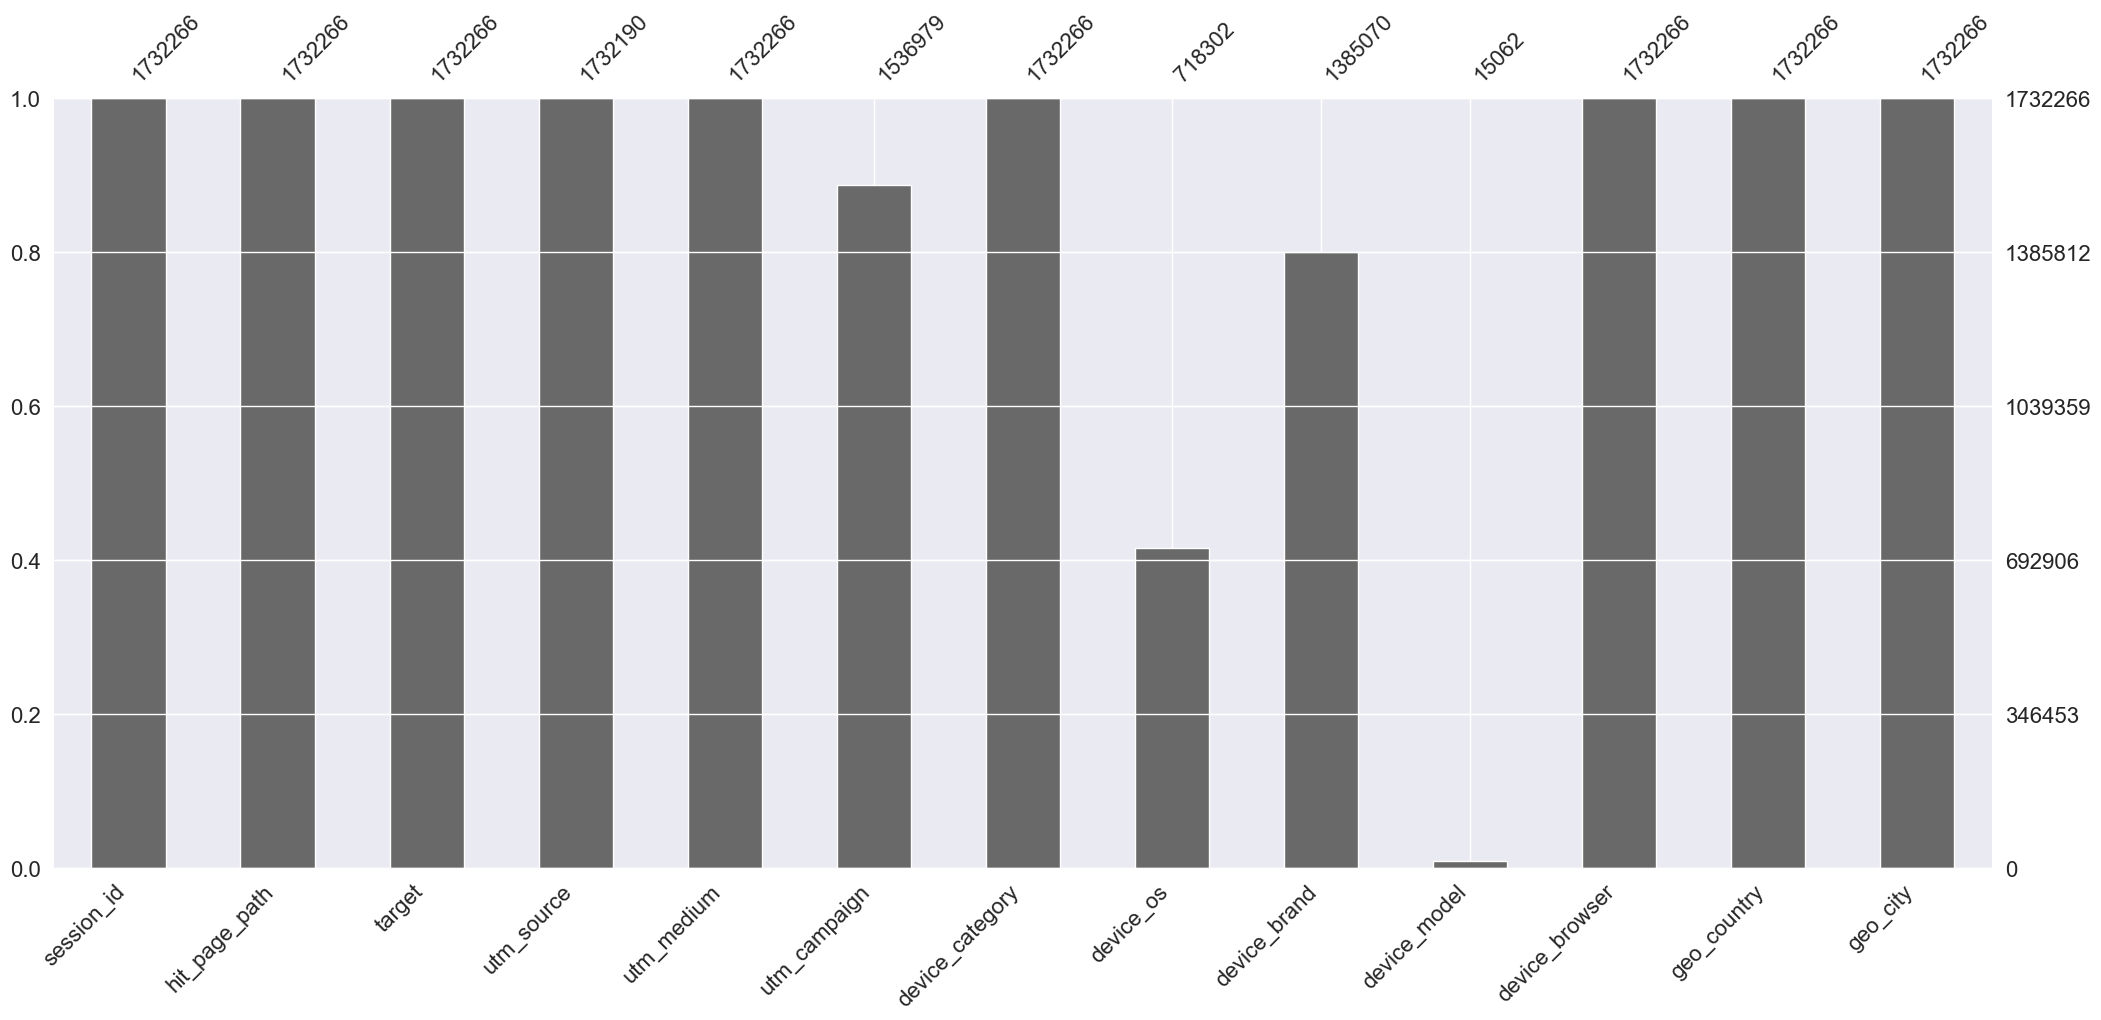

In [18]:
# диаграмма заполненности
msno.bar(df_united_clean)

In [19]:
def blank_rows_percentage(df):
  """Вывод колонок и процента пропусков в каждой"""
  print((df.isna().sum() / len(df) * 100).sort_values(ascending=False))

In [20]:
blank_rows_percentage(df_united_clean)

device_model       99.130503
device_os          58.533966
device_brand       20.042880
utm_campaign       11.273500
utm_source          0.004387
session_id          0.000000
hit_page_path       0.000000
target              0.000000
utm_medium          0.000000
device_category     0.000000
device_browser      0.000000
geo_country         0.000000
geo_city            0.000000
dtype: float64


Есть пропуски, удалим все колонки где отсутсвует больше 20% данных:

In [21]:
df_united_clean = df_united_clean.drop(columns=['device_model', 'device_os', 'device_brand', 'session_id'], axis=1)

Посмотрим на полноту данных теперь

In [22]:
print_useful_rows_info(df_united_clean)

Amount of useful rows: 1536903
Persentage of filled rows 88.72


Полнота данных была 0.82% стала 88.7%, что уже хорошо  
Теперь обработаем оставшиеся пропуски

### Заполнение пропусков

In [23]:
blank_rows_percentage(df_united_clean)

utm_campaign       11.273500
utm_source          0.004387
hit_page_path       0.000000
target              0.000000
utm_medium          0.000000
device_category     0.000000
device_browser      0.000000
geo_country         0.000000
geo_city            0.000000
dtype: float64


Посмотрим из каких значений состоит категория utm_campaign

In [24]:
df_united_clean.utm_campaign.describe()

count                  1536979
unique                     406
top       LTuZkdKfxRGVceoWkVyg
freq                    422992
Name: utm_campaign, dtype: object

заполним как 'other', чтобы не исказить вывод о том какая компания более эффективна

In [25]:
df_united_clean.utm_campaign = df_united_clean.utm_campaign.fillna('other')

In [26]:
df_united_clean.utm_source.isna().sum()

76

В признаке utm_source пропущены тысячные доли процента данных, поэтому можем удалить эти строки

In [27]:
df_united_clean = df_united_clean[df_united_clean.utm_source.notna()]

In [28]:
print_useful_rows_info(df_united_clean)

Amount of useful rows: 1732190
Persentage of filled rows 100.0


Пропуски устранены

#### Преобразование содержимого столбцов под поставленные задачи

Для ответа на поставленные вопросы, будут необходимы бренд и модель авто.  

In [29]:
df_united_clean.hit_page_path.values[10]

'sberauto.com/cars/all/volkswagen/polo/e994838f?rental_page=rental_car'

Их можно получить из url-пути по которому посетитель заходил на сайт, так и сделаем.

In [30]:
df_united_clean.hit_page_path.str.contains('/cars/all/', regex=False).value_counts()

hit_page_path
False    1511479
True      220711
Name: count, dtype: int64

Данные присутствуют частично, остальным поставим значение бренда и модели как *'empty'*

In [31]:
df_united_clean['car_brand'] = df_united_clean.hit_page_path.apply(lambda x: x.split('/')[3] if '/cars/all/' in x else 'empty')
df_united_clean['car_model'] = df_united_clean.hit_page_path.apply(lambda x: x.split('/')[4] if '/cars/all/' in x else 'empty')
df_united_clean = df_united_clean.drop(columns=['hit_page_path'])

Нам будет нужно исследовать эффективность работы рекламы из соцсетей, подготовим столбец с этим признаком.  
- Из соцсетей это значения utm_source:  
['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs', 'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']

In [32]:
df_united_clean['from_smm'] = df_united_clean.utm_source.apply(lambda x: 1 if x in ['QxAxdyPLuQMEcrdZWdWb', 
                                                                                    'MvfHsxITijuriZxsqZqt', 
                                                                                    'ISrKoXQCxqqYvAZICvjs', 
                                                                                    'IZEXUFLARCUMynmHNBGo', 
                                                                                    'PlbkrSYoHuZBWfYjYnfw', 
                                                                                    'gVRrcxiDQubJiljoTbGm'] else 0)
df_united_clean = df_united_clean.drop(columns=['utm_source'])

Нам будет нужно исследовать органический трафик, подготовим столбец с этим признаком.  
- Органический трафик это значения utm_source: ['organic', 'referral', '(none)']

In [33]:
df_united_clean['is_organic'] = df_united_clean.utm_medium.apply(lambda x: 1 if x in ['organic', 'referral', '(none)'] else 0)
df_united_clean = df_united_clean.drop(columns=['utm_medium'])

СберАвтоподписка работает только по РФ поэтому удаляем все остальные страны из датасета

In [34]:
df_united_clean.geo_country.describe()

count     1732190
unique        159
top        Russia
freq      1682347
Name: geo_country, dtype: object

In [35]:
df_united_clean = df_united_clean[df_united_clean.geo_country == 'Russia']
df_united_clean = df_united_clean.drop(columns = ['geo_country'], axis=1)

Переименуем столбец в city, так понятнее смысл его содержимого

In [36]:
df_united_clean = df_united_clean.rename(columns={'geo_city': 'city'})

Рассмотрим столбец целевого действия

In [37]:
df_united_clean.target.describe()

count    1.682347e+06
mean     5.996266e-02
std      6.064261e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.740000e+02
Name: target, dtype: float64

Для наших задач важно только то было ли целевое действие хотя бы одно или нет, поэтому преобразуем содержимое столбца в:  
1 - было целевое действие  
0 - не было целевого действия

In [38]:
df_united_clean['target'] = df_united_clean.target.apply(lambda x: 1 if x > 0 else 0)

### Определение типов переменных в датасете df_united

|  Переменная               | Дискретная | Непрерывная | Качественная |
|---------------------------|------------|-------------|--------------|
| from_smm                  |            |             | X            |
| is_organic                |            |             | X            |
| device_category           |            |             | X            |
| device_browser            |            |             | X            |
| city                      |            |             | X            |
| car_brand                 |            |             | X            |
| car_model                 |            |             | X            |
| target(целевая)           |            |             | X            |

Преобразуем категориальные переменные в category, для более эффективной работы в дальнейшем

In [39]:
df_united_clean.device_category = df_united_clean.device_category.astype('category')
df_united_clean.device_browser = df_united_clean.device_browser.astype('category')
df_united_clean.utm_campaign = df_united_clean.utm_campaign.astype('category')
df_united_clean.city = df_united_clean.city.astype('category')
df_united_clean.car_brand = df_united_clean.car_brand.astype('category')
df_united_clean.car_model = df_united_clean.car_model.astype('category')

Посмотрим на итог преобразований

In [40]:
df_united_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1682347 entries, 0 to 1732265
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype   
---  ------           --------------    -----   
 0   target           1682347 non-null  int64   
 1   utm_campaign     1682347 non-null  category
 2   device_category  1682347 non-null  category
 3   device_browser   1682347 non-null  category
 4   city             1682347 non-null  category
 5   car_brand        1682347 non-null  category
 6   car_model        1682347 non-null  category
 7   from_smm         1682347 non-null  int64   
 8   is_organic       1682347 non-null  int64   
dtypes: category(6), int64(3)
memory usage: 64.2 MB


## 2.2 Exploring

#### Рассмотрим соотношение совершивших и не совершивших целевое действие

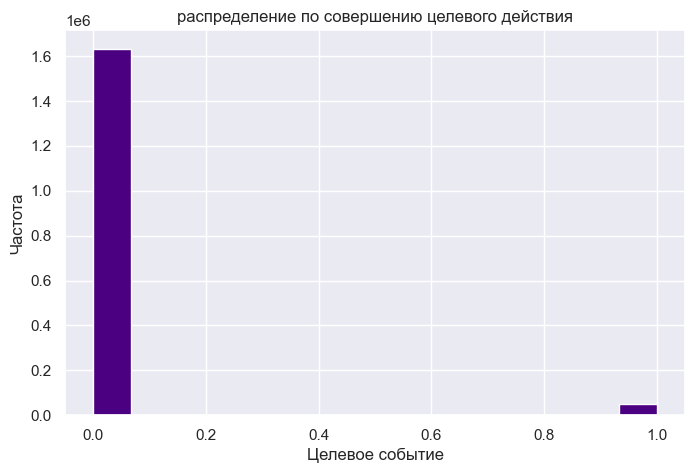

In [41]:
plt.figure(figsize=(8, 5))
plt.hist(df_united_clean.target, bins=15, color='indigo')
plt.xlabel('Целевое событие')
plt.ylabel('Частота')
plt.title('распределение по совершению целевого действия');

Количество не совершивших целевое действие значительно больше количества совершивших, что является нормальным

### Визуализация категориальных переменных

##### Бренды авто которые смотрят пользователи

In [42]:
df_car_brand_amount = df_united_clean[df_united_clean.car_brand != 'empty'] \
                                        .groupby(['car_brand'], as_index=False) \
                                        .target.count() \
                                        .rename(columns={'target': 'amount'})

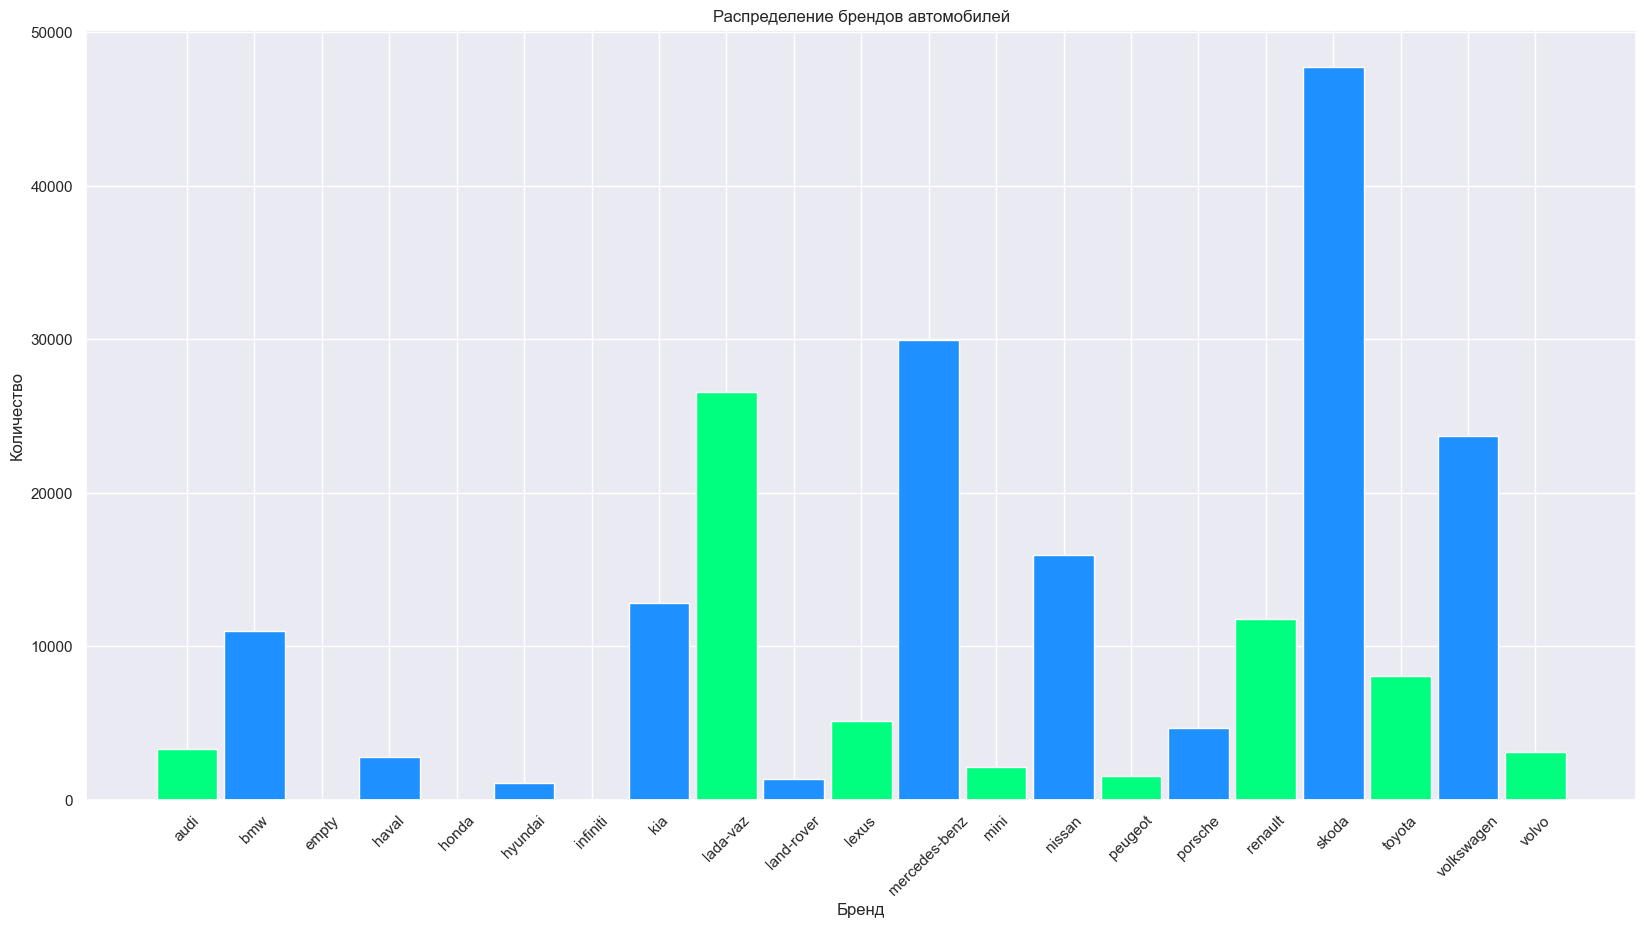

In [43]:
plt.figure(figsize=(20, 10))
plt.bar(df_car_brand_amount.car_brand, df_car_brand_amount.amount, color=['springgreen', 'dodgerblue'], width=0.9)
plt.xticks(rotation=45)
plt.xlabel('Бренд')
plt.ylabel('Количество')
plt.title('Распределение брендов автомобилей');

Skoda значительно отрывается по просмотрам от остальных брендов  
Российский бренд Лада на 3 месте, т.е. довольно популярен среди пользователей

##### Городов из которых приходят пользователи

In [44]:
df_city_amount = df_united_clean[df_united_clean.city != '(not set)'] \
                                        .groupby(['city'], as_index=False) \
                                        .target.count() \
                                        .rename(columns={'target': 'amount'}) \
                                        .sort_values(by='amount', ascending=False)

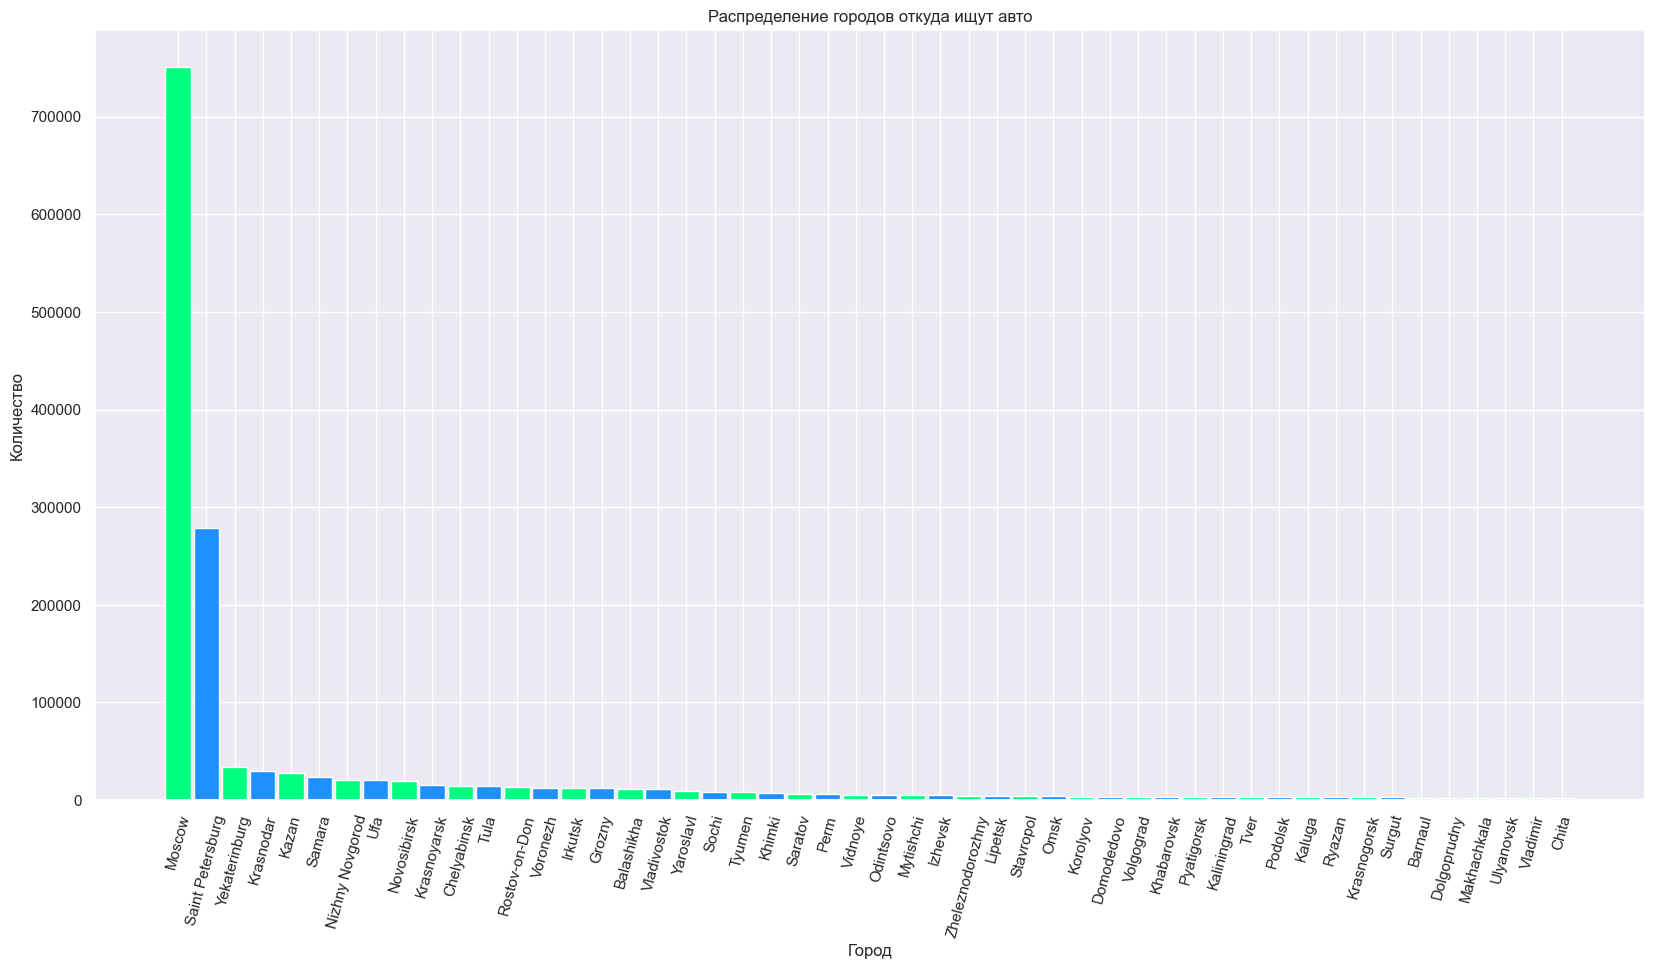

In [45]:

plt.figure(figsize=(20, 10))
plt.bar(df_city_amount.city.head(50), df_city_amount.amount.head(50), color=['springgreen', 'dodgerblue'], width=0.9)
plt.xticks(rotation=75)
plt.xlabel('Город')
plt.ylabel('Количество')
plt.title('Распределение городов откуда ищут авто');

Впереди Москва и города миллионники, аномалий не наблюдается

##### Браузеры с которых заходят на сайт пользователи

In [46]:
df_united_clean.device_browser.unique()

['Chrome', 'Samsung Internet', 'Safari', 'YaBrowser', 'Edge', ..., 'com.zhiliaoapp.musically', 'Konqueror', 'Iron', 'Threads 202.0.0.23.119', '(not set)']
Length: 30
Categories (30, object): ['(not set)', 'Amazon Silk', 'Android Browser', 'Android Webview', ..., '[FBAN', 'com.vk.vkclient', 'com.zhiliaoapp.musically', 'helloworld']

In [47]:
df_device_browser_amount = df_united_clean[df_united_clean.device_browser != '(not set)'] \
                                                    .groupby(['device_browser'], as_index=False) \
                                                    .target.count() \
                                                    .rename(columns={'target': 'amount'}) \
                                                    .sort_values(by='amount', ascending=False)


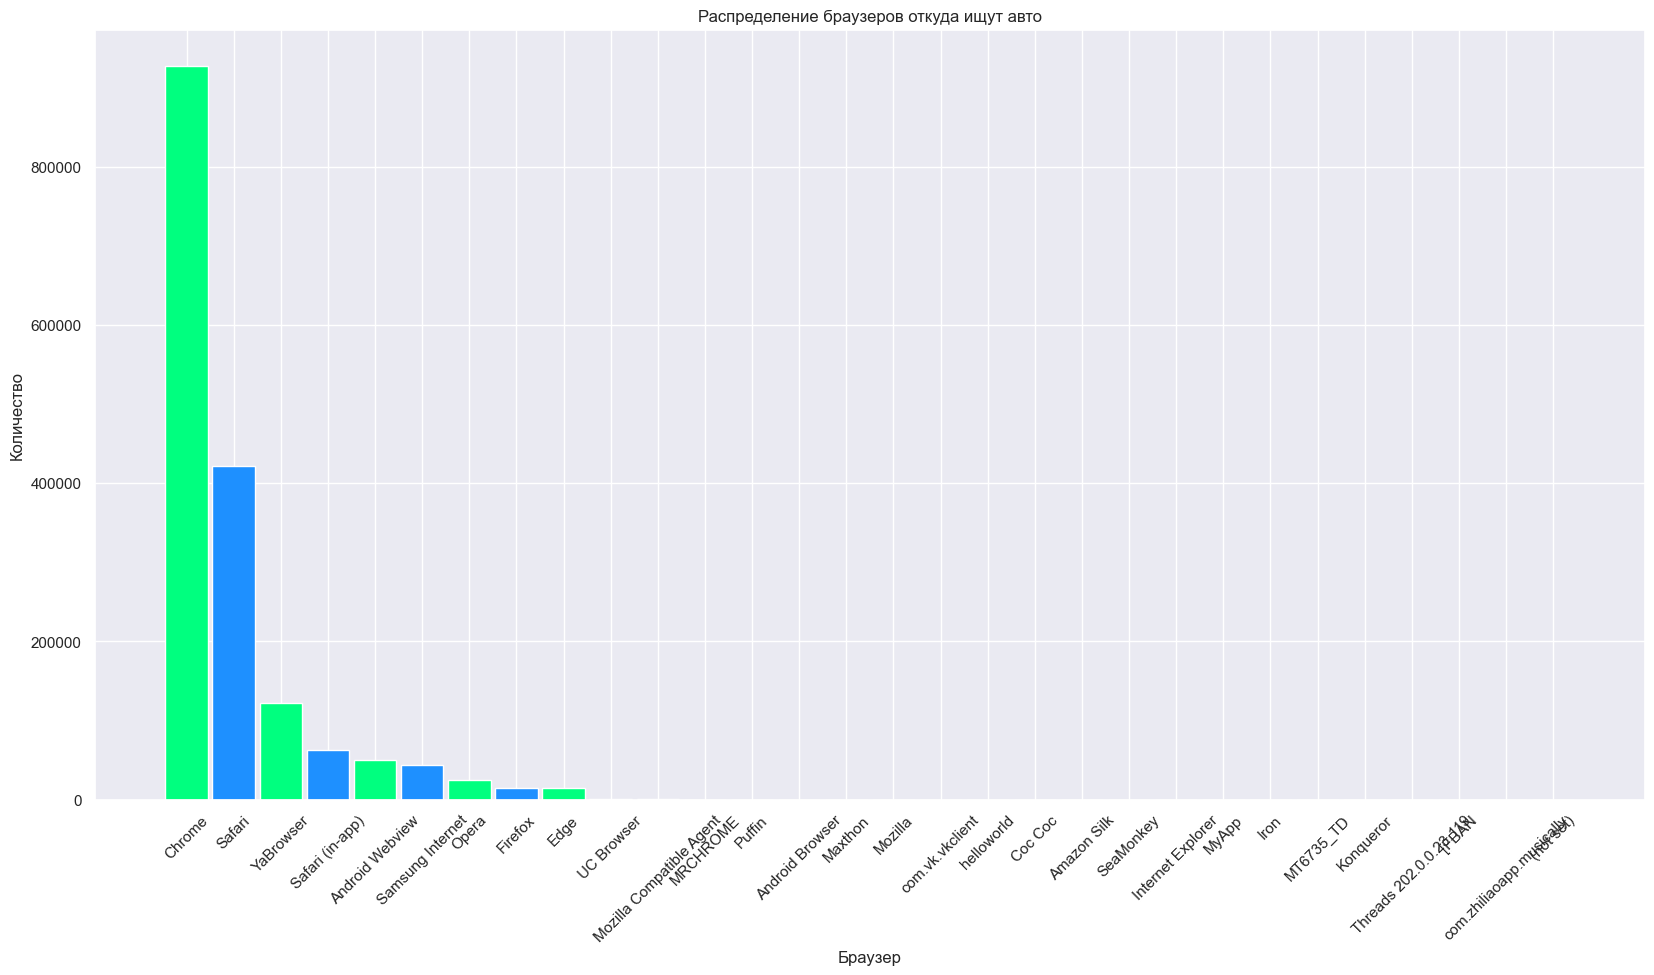

In [48]:
plt.figure(figsize=(20, 10))
plt.bar(df_device_browser_amount.device_browser, df_device_browser_amount.amount, color=['springgreen', 'dodgerblue'], width=0.9)
plt.xticks(rotation=45)
plt.xlabel('Браузер')
plt.ylabel('Количество')
plt.title('Распределение браузеров откуда ищут авто');

Чаще всего Chrome, на втором месте Safari и третье ЯндексБраузер  
Аномалий не наблюдается

##### Устройства с которых заходят на сайт пользователи

In [49]:

df_united_clean.device_category.unique()

['mobile', 'desktop', 'tablet']
Categories (3, object): ['desktop', 'mobile', 'tablet']

In [50]:
df_device_category_amount = df_united_clean.groupby(['device_category'], as_index=False).target.count() \
                .rename(columns={'target': 'amount'})
df_device_category_amount

,device_category,amount
0,desktop,332991
1,mobile,1333547
2,tablet,15809


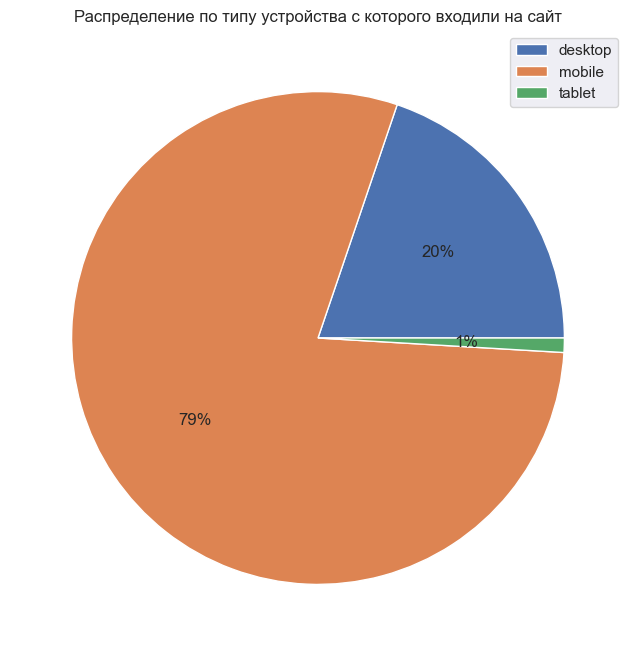

In [51]:
plt.figure(figsize=(12, 8))
plt.pie(df_device_category_amount.amount, labels=df_device_category_amount.device_category, labeldistance=None, autopct = '%1.0f%%')
plt.title("Распределение по типу устройства с которого входили на сайт")
plt.legend()
plt.show();

Наиболее часто заходят с телефонов, потом компьютер, потом планшет  
Результат ожидаемый

# 3.Modeling - Моделирование и проверка статистическиз гипотез

### 1. Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события.

Гипотезы:  
h0 - Органический трафик не отличается от платного  
h1 - Органический трафик отличается от платного

In [52]:
def calculate_cr(df):
    """Функция расчета конверсии в целевое событие"""
    return df.target.sum() / len(df)

CR общий

In [53]:
cr_general = calculate_cr(df_united_clean) 
cr_general

0.029215732545069477

CR органического

In [54]:
cr_organic = calculate_cr(df_united_clean[df_united_clean.is_organic == 1])
cr_organic

0.044897331693492325

CR платного

In [55]:
cr_paid = calculate_cr(df_united_clean[df_united_clean.is_organic == 0])
cr_paid

0.023509898072431566

В данном случае есть только два исхода для целевого события и выборки независимы, поэтому применим **биномиальный тест**

In [66]:
stats.binom_test(x= df_united_clean[df_united_clean.is_organic == 1].target.sum(), \
                n= len(df_united_clean[df_united_clean.is_organic == 1]), \
                p =cr_paid)

5e-324

Уровень значимости в 5% не достигнут, значит отбрасываем альтернативнуб гипотезу

#### Вывод: *органический трафик стастически значимо **отличается от платного***
- Конверсия органического трафика 4.49%
- Конверсия платного трафика 2.35%

### 2. Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.

Гипотезы:  
h0 - Трафик с мобильных устройств не отличается от трафика с десктопных устройств  
h1 - Трафик с мобильных устройств отличается от трафика с десктопных устройств

In [67]:
cr_mobile = calculate_cr(df_united_clean[df_united_clean.device_category == 'mobile'])
cr_mobile

0.028214978549687412

In [68]:
cr_desktop = calculate_cr(df_united_clean[df_united_clean.device_category == 'desktop'])
cr_desktop

0.03338528668943005

In [69]:
all_mobile = df_united_clean[df_united_clean.device_category == 'mobile'].target.sum()

In [70]:
success_mobile = len(df_united_clean[df_united_clean.device_category == 'mobile'])

В данном случае есть только два исхода для целевого события и выборки независимы, поэтому применим **биномиальный тест**

In [71]:
stats.binom_test(x= all_mobile, \
                n= success_mobile, \
                p =cr_desktop)

3.5924903571934647e-255

Уровень значимости в 5% не достигнут, значит отбрасываем альтернативную гипотезу

#### Вывод: *Трафик с мобильных устройств статистически значимо **отличается от трафика с десктопных устройств.***
- Конверсия трафика с мобильных устройств 2.82%
- Конверсия трафика с десктопных устройств 3.33%

### 3. Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события

Гипотезы:  
h0 - Трафик из городов присутствия не отличается от трафика из иных регионов  
h1 - Трафик из городов присутствия отличается от трафика из иных регионов

Создадим отдельный столбец с признаком того, является ли локация городом присутсвия

In [59]:
df_united_clean.city.nunique()

505

In [60]:
df_united_clean.city.unique()

['Gelendzhik', 'Voronezh', 'Cherkessk', 'Irkutsk', 'Moscow', ..., '13403', 'Bavly', 'Kresttsy', 'Beslan', 'Aleksandrovsk-Sakhalinskiy']
Length: 505
Categories (505, object): ['(not set)', '13403', '14076', '24130', ..., 'Zvenigorod', 'Тарасовка', 'Тимофеевка', 'Хомутово']

Воспользуемся библиотекой geopy для определения города и области

In [4]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="tutorial")

Создадим новый признак с полным названием локации

In [11]:
df_united_clean['region'] = df_united_clean.city.apply(lambda x: geolocator.geocode(x + ', Russia'))

In [ ]:
df_united_clean = df_united_clean[df_united_clean.region.notna()]

Выделим имя города чтобы отобрать Москву и Санкт-Петербург

In [ ]:
df_united_clean['city_name'] = df_united_clean.region.apply(lambda x: x.address.split(', ')[0])
df_united_clean.city_name

/var/folders/zz/zyxvpxvq6csfxvn_n003whnr00z45f/T/ipykernel_8918/896059053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_united_clean['city_name'] = df_united_clean.region.apply(lambda x: x.address.split(', ')[0])


0                           Геленджик
1             городской округ Воронеж
2          Черкесский городской округ
3                   Иркутская область
4                              Москва
                      ...            
1732261                        Москва
1732262               Санкт-Петербург
1732263               Нижний Новгород
1732264                     Челябинск
1732265               Железнодорожный
Name: city_name, Length: 1613909, dtype: object

Выделим область чтобы выделить в дальнейшем локации из Московской области

In [ ]:
df_united_clean['territory'] = df_united_clean.region.apply(lambda x: x.address.split(', ')[1])
df_united_clean.territory

/var/folders/zz/zyxvpxvq6csfxvn_n003whnr00z45f/T/ipykernel_8918/164124031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_united_clean['territory'] = df_united_clean.region.apply(lambda x: x.address.split(', ')[1])


0                  городской округ Геленджик
1                        Воронежская область
2                         Карачаево-Черкесия
3                Сибирский федеральный округ
4              Центральный федеральный округ
                         ...                
1732261        Центральный федеральный округ
1732262    Северо-Западный федеральный округ
1732263      городской округ Нижний Новгород
1732264                      Советский район
1732265      Правдинский муниципальный округ
Name: territory, Length: 1613909, dtype: object

In [ ]:
df_united_clean[df_united_clean.city_name.isin(['Москва', 'Санкт-Петербург']) \
                | df_united_clean.territory.isin(['Московская область'])] \
                .target.value_counts()

target
0    1004987
1      30964
Name: count, dtype: int64

In [ ]:
df_united_clean[~df_united_clean.city_name.isin(['Москва', 'Санкт-Петербург']) \
                & ~df_united_clean.territory.isin(['Московская область'])] \
                .target.value_counts()

target
0    561209
1     16749
Name: count, dtype: int64

Количество выполнивших целевое действие из региона присуствия

In [72]:
success_metropolitan = df_united_clean[df_united_clean.city_name.isin(['Москва', 'Санкт-Петербург']) \
                | df_united_clean.territory.isin(['Московская область'])].target.sum()
success_metropolitan

30964

Количество выполнивших целевое действие из остальных регионов

In [73]:
all_metropolitan = len(df_united_clean[df_united_clean.city_name.isin(['Москва', 'Санкт-Петербург']) \
                | df_united_clean.territory.isin(['Московская область'])])
all_metropolitan

1035951

CR из остальных регионов

In [74]:
cr_province = calculate_cr(df_united_clean[~df_united_clean.city_name.isin(['Москва', 'Санкт-Петербург']) \
                & ~df_united_clean.territory.isin(['Московская область'])])
cr_province

0.028979614435651033

В данном случае есть только два исхода для целевого события и выборки независимы, поэтому применим **биномиальный тест**

In [75]:
stats.binom_test(x= success_metropolitan, \
                n= all_metropolitan, \
                p =cr_province)

3.931734218318095e-08

Уровень значимости в 5% не достигнут, значит отбрасываем альтернативнуб гипотезу

#### Вывод: *Трафик из городов присутствия (Москва и область, Санкт-Петербург) статистически значимо **отличается от трафика из иных регионов.***

### 4. Из каких источников (кампаний, устройств, локаций) к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?

#### Исследуем целевой трафик с точки зрения объема

In [76]:
df_device_tv = df_united_clean.groupby(['device_category'], as_index=False) \
                        .agg({'target': 'sum'}) \
                        .sort_values('target', ascending=False) \
                        .rename(columns={'target': 'success_amount'})

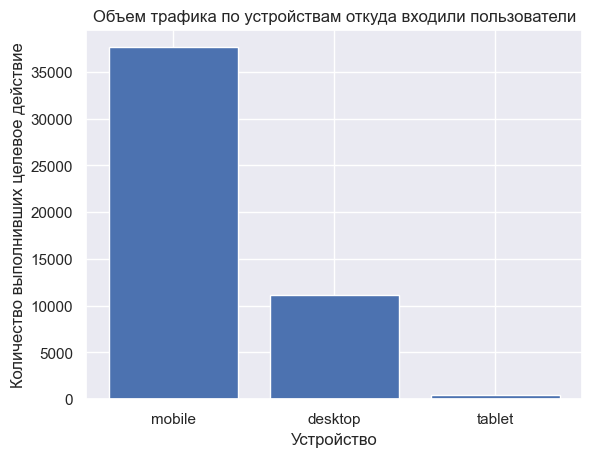

In [69]:
plt.bar(df_device_tv.device_category, df_device_tv.success_amount)
plt.xlabel('Устройство')
plt.ylabel('Количество выполнивших целевое действие')
plt.title('Объем трафика по устройствам откуда входили пользователи');

Наибольший объем трафика из ***мобильных устройств***

In [77]:
df_city_tv = df_united_clean.groupby(['city'], as_index=False) \
                        .agg({'target': 'sum'}) \
                        .sort_values('target', ascending=False) \
                        .rename(columns={'target': 'success_amount'}).head(10)

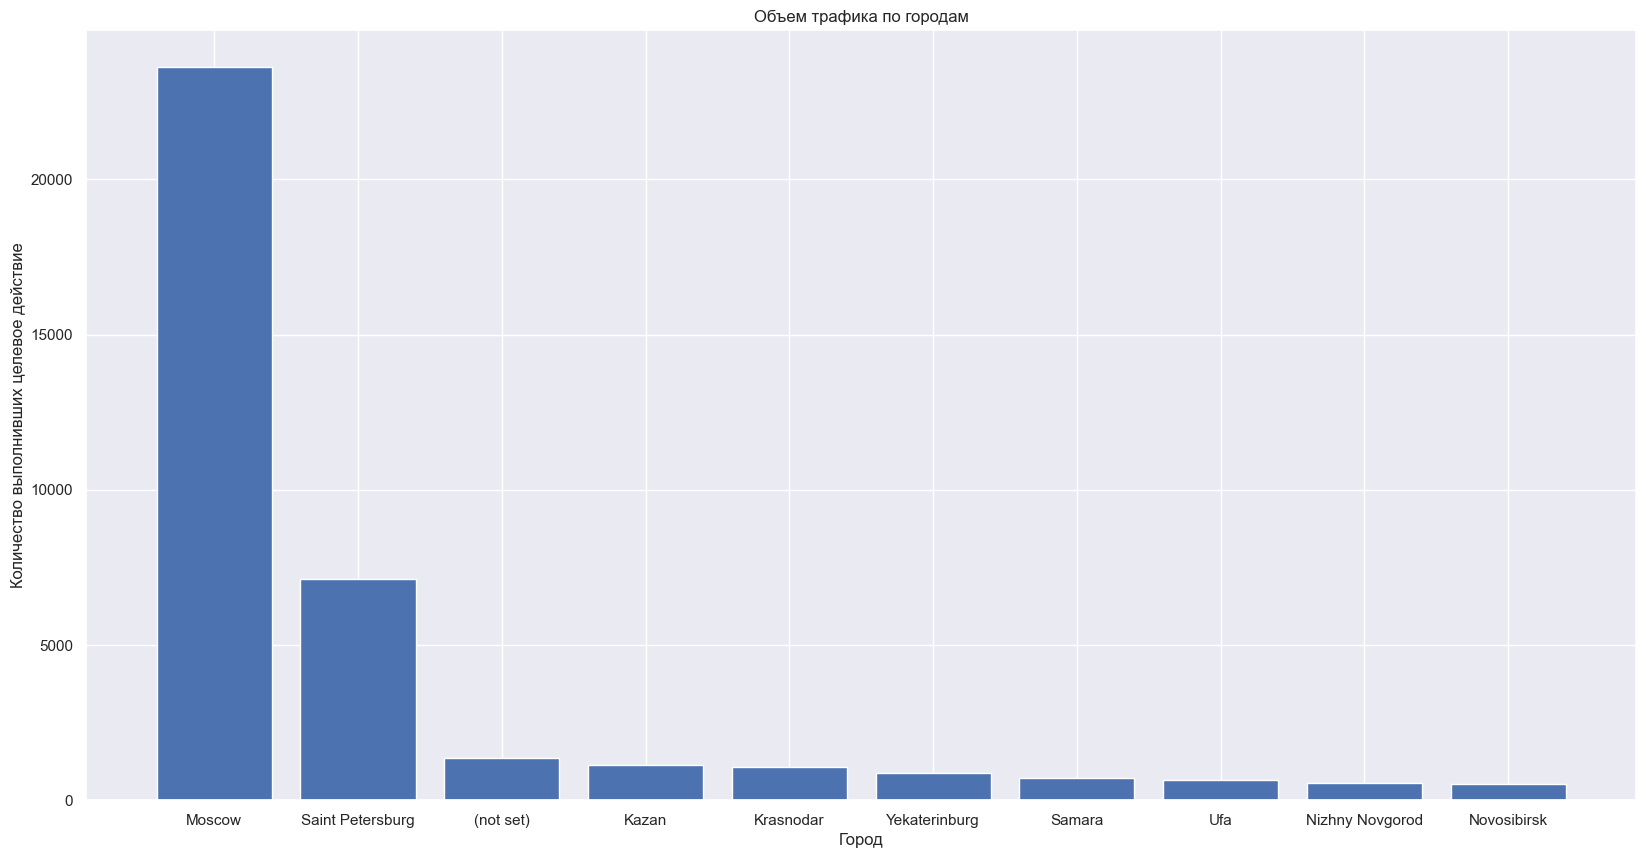

In [68]:
plt.figure(figsize=(20, 10))
plt.bar(df_city_tv.city, df_city_tv.success_amount)
plt.xlabel('Город')
plt.ylabel('Количество выполнивших целевое действие')
plt.title('Объем трафика по городам');

Наибольший объем трафика из ***города Москвы***

In [78]:
df_united_clean.groupby(['utm_campaign'], as_index=False) \
                        .agg({'target': 'sum'}) \
                        .sort_values('target', ascending=False) \
                        .rename(columns={'target': 'success_amount'}).head(5)

,utm_campaign,success_amount
80,LTuZkdKfxRGVceoWkVyg,18380
77,LEoPHuyFvzoNfnzGgfcd,9182
299,other,7068
238,gecBYcKZCPMcVYdSSzKP,4487
39,FTjNLDyTrXaWYgZymFkV,2407


Наибольший объем трафика от ***компании LTuZkdKfxRGVceoWkVyg***

#### Исследуем целевой трафик с точки CR

In [79]:
df_device_cr = df_united_clean.groupby(['device_category'], as_index=False) \
                        .agg({'target': 'mean'}) \
                        .sort_values('target', ascending=False) \
                        .rename(columns={'target': 'CR'})

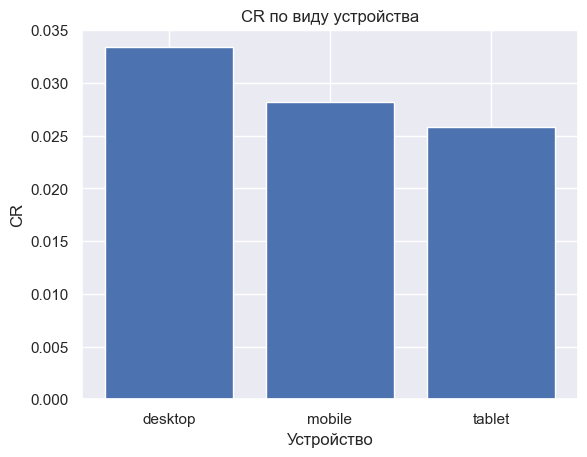

In [99]:
plt.bar(df_device_cr.device_category, df_device_cr.CR)
plt.xlabel('Устройство')
plt.ylabel('CR')
plt.title('CR по виду устройства');

Наибольшая конверсия у ***мобильных устройств***

In [80]:
df_city_cr = df_united_clean.groupby(['city'], as_index=False) \
                        .agg({'target': 'mean'}) \
                        .sort_values('target', ascending=False) \
                        .rename(columns={'target': 'CR'}).head(15)

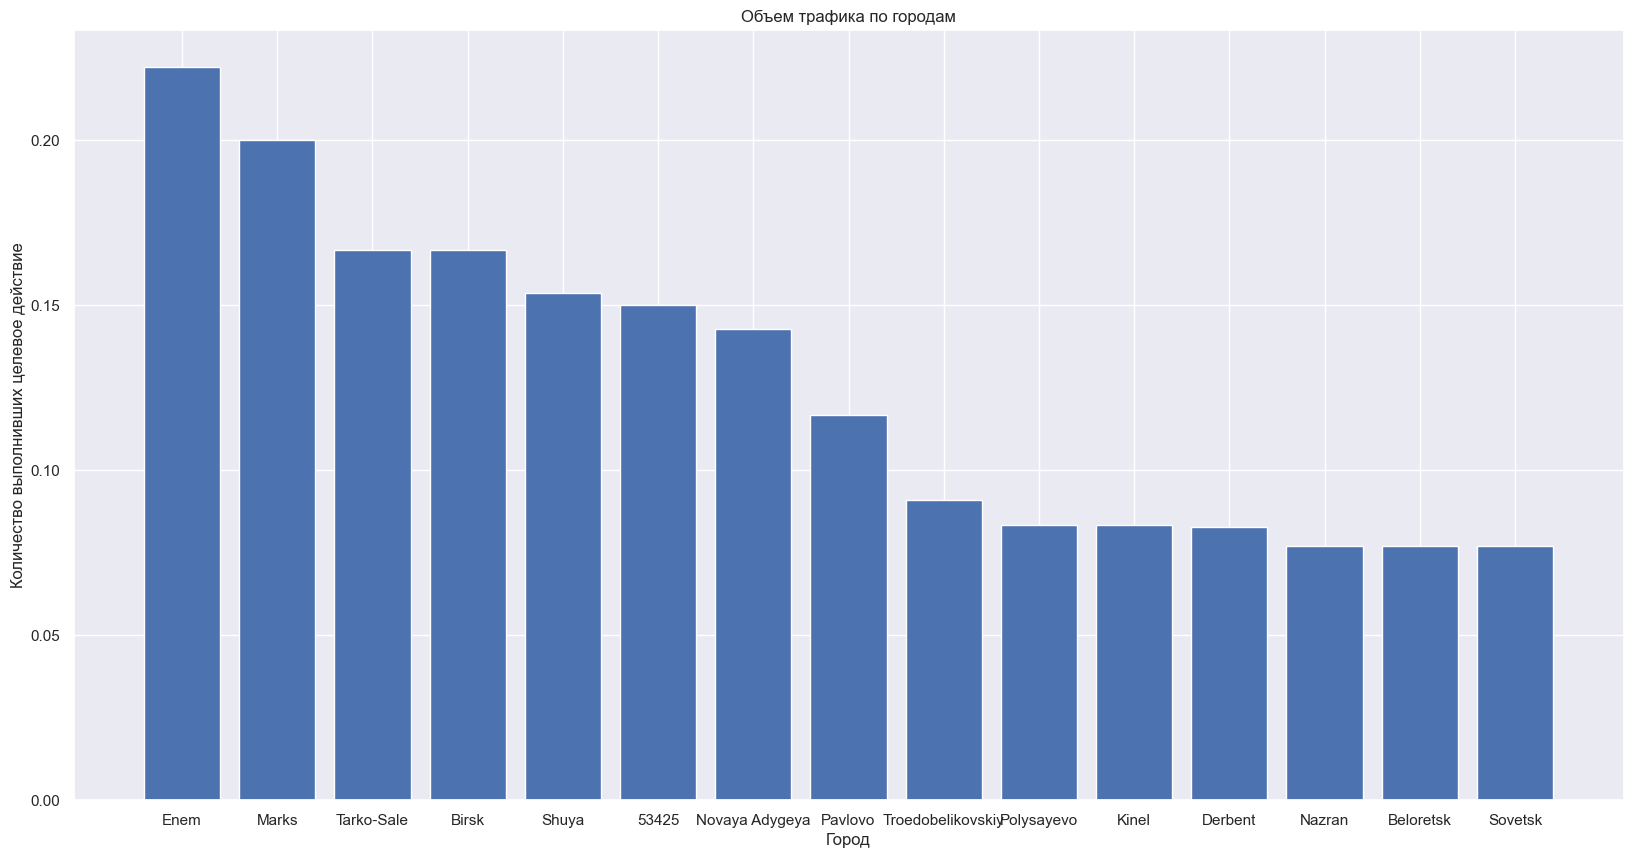

In [98]:
plt.figure(figsize=(20, 10))
plt.bar(df_city_cr.city, df_city_cr.CR)
plt.xlabel('Город')
plt.ylabel('Количество выполнивших целевое действие')
plt.title('Объем трафика по городам');

Наибольшая конверсия у ***города Энем***

In [81]:
df_united_clean.groupby(['utm_campaign'], as_index=False) \
                        .agg({'target': 'mean'}) \
                        .sort_values('target', ascending=False) \
                        .rename(columns={'target': 'CR'}).head(5)

,utm_campaign,CR
63,JkhCpeDGCtTwhwqWLywv,1.000000
88,MHdHrBKQwbDaRalwnlJq,1.000000
52,IRKNegNgOUQLwudzMElF,0.875000
133,SbYAsCvXapXBOIxEKBZs,0.500000
275,lndNIerCYECRQvBTyTye,0.305556


Наибольшая конверсия через ***компанию JkhCpeDGCtTwhwqWLywv и MHdHrBKQwbDaRalwnlJq***

#### С точки зрения объема больше всего трафика идет из:

- устройство: "мобильный телефон"
- город: "Москва"
- рекламная компания: "LTuZkdKfxRGVceoWkVyg"  


#### С точки зрения CR больше всего трафика идет из:

- устройство: "персональный компьютер"
- город: "Энем"
- рекламная компания: "MHdHrBKQwbDaRalwnlJq" и "IRKNegNgOUQLwudzMElF"

### 5. Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?

In [82]:
df_cars_success = df_united_clean.groupby(['car_model'], as_index=False) \
                        .agg({'target': 'sum'}) \
                        .sort_values('target', ascending=False) \
                        .rename(columns={'target': 'success_amount'}).head(20)
df_cars_success.drop(index=df_cars_success.index [0], axis= 0, inplace= True)

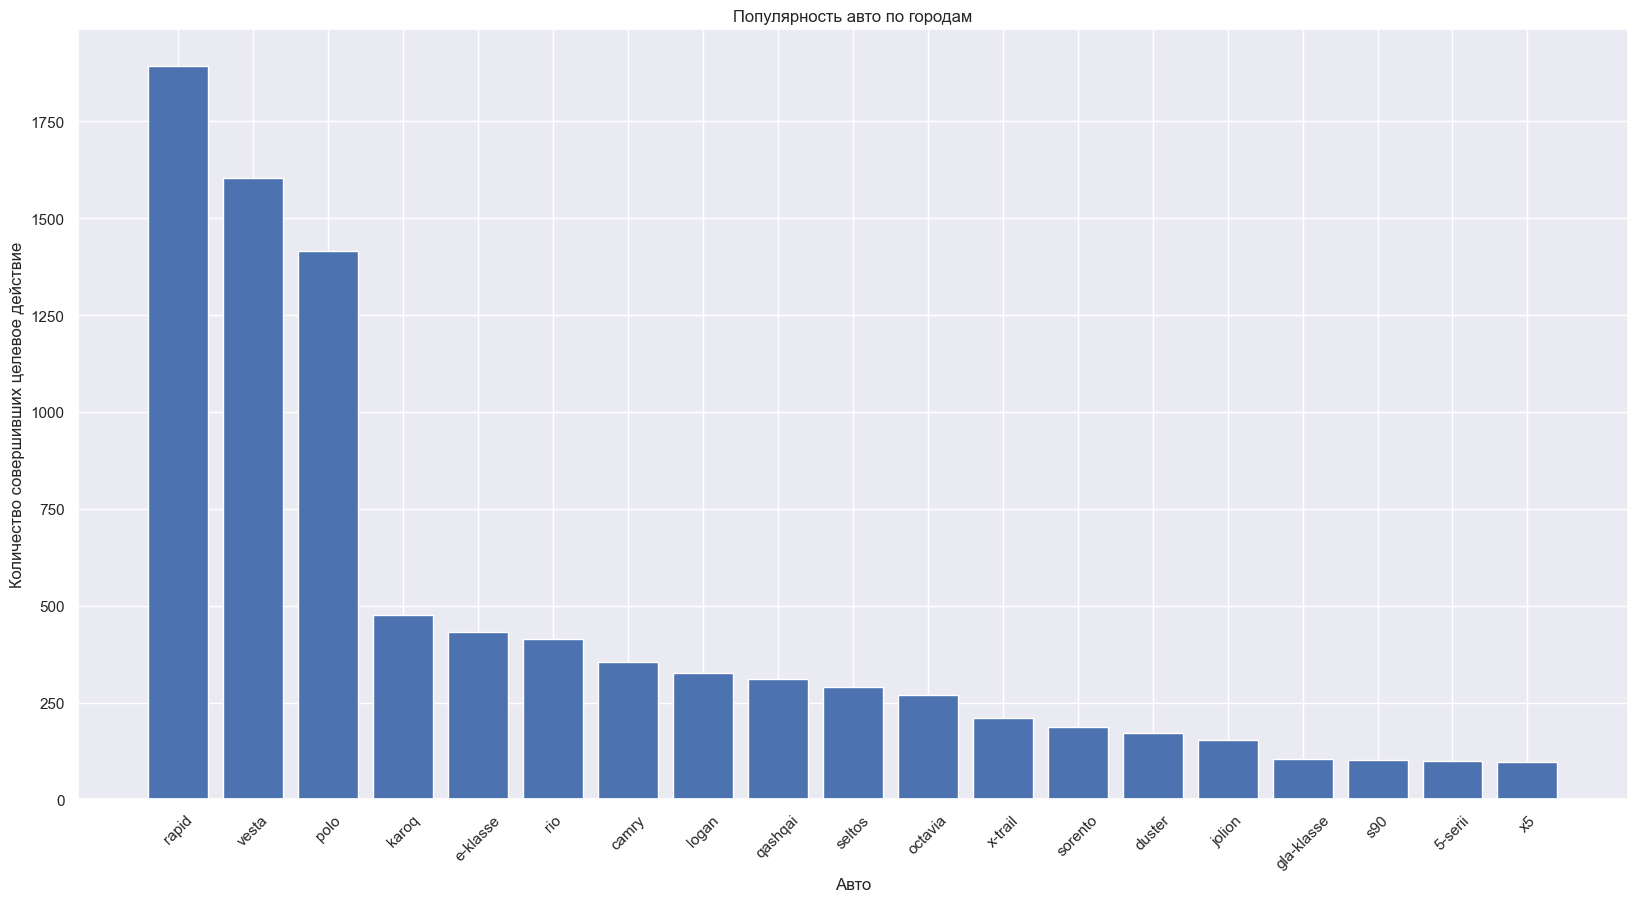

In [97]:
plt.figure(figsize=(20, 10))
plt.bar(df_cars_success.car_model, df_cars_success.success_amount)

plt.xticks(rotation=45)
plt.xlabel('Авто')
plt.ylabel('Количество совершивших целевое действие')
plt.title('Популярность авто по городам');

Наибольшим спросом пользуется rapid, vesta, polo.

In [83]:
df_cars_cr = df_united_clean.groupby(['car_model'], as_index=False) \
                        .agg({'target': 'mean'}) \
                        .sort_values('target', ascending=False) \
                        .rename(columns={'target': 'CR'}).head(15)

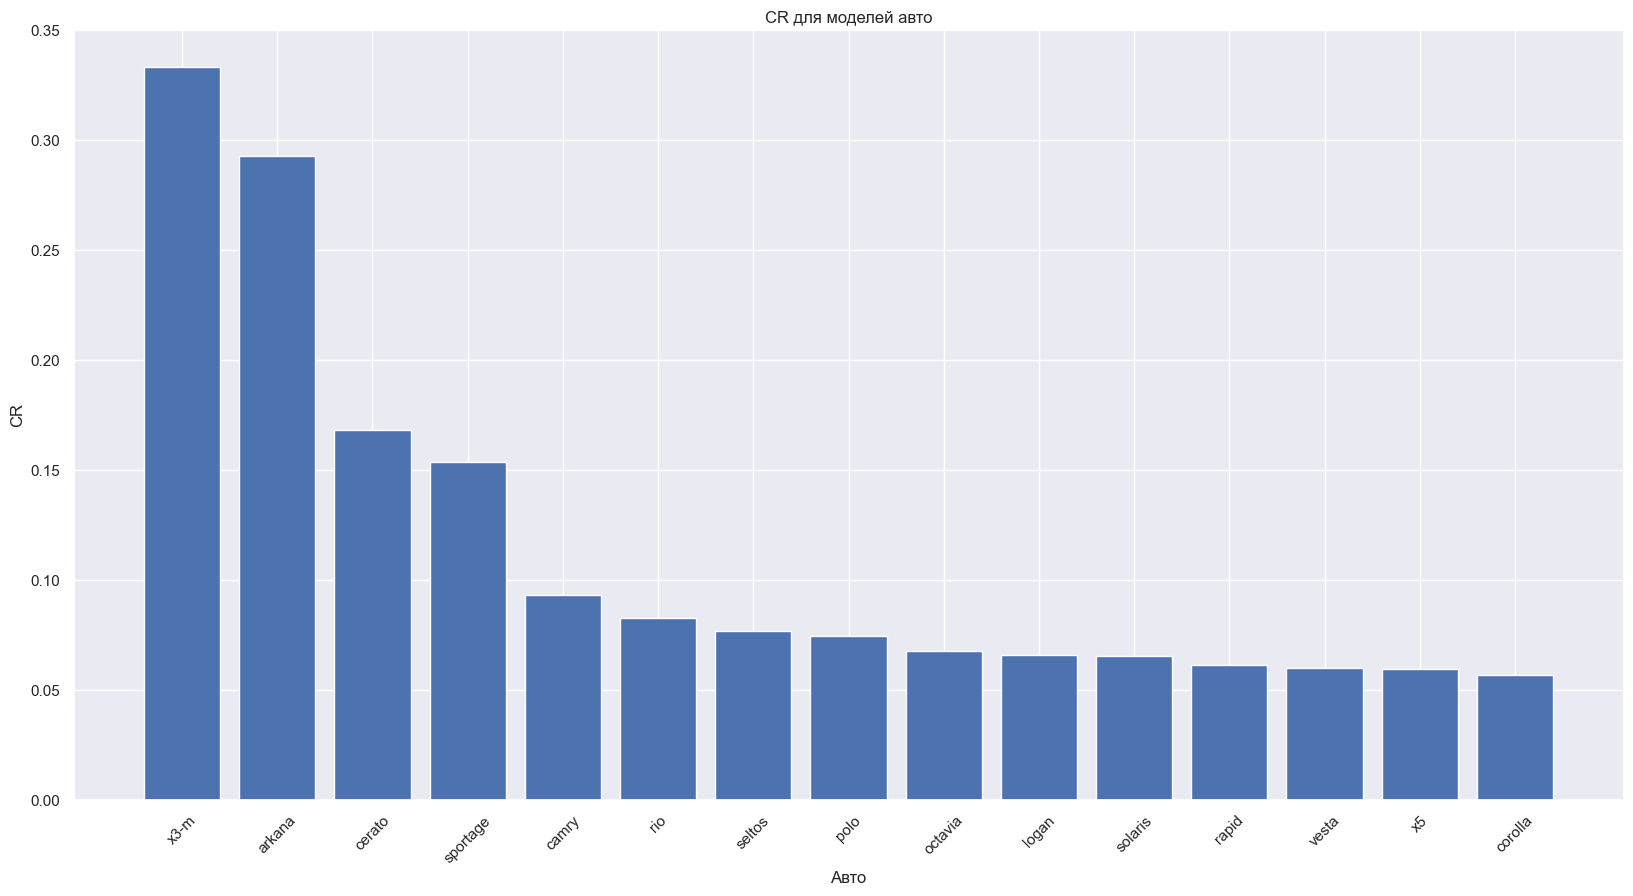

In [96]:
plt.figure(figsize=(20, 10))
plt.bar(df_cars_cr.car_model, df_cars_cr.CR)

plt.xticks(rotation=45)
plt.xlabel('Авто')
plt.ylabel('CR')
plt.title('CR для моделей авто');

Наибольший CR у x3-m, arkana, cerato.

#### Популярность авто по: 
1. CR это: x3-m, arkana, cerato
2. Количеству:  rapid, vesta, polo

### 6. Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?

Для ответа на этот вопрос необходимо исследовать CR у соцсетей.  
Сгруппируем данные по источнику трафика и посчитаем конверсии групп.

In [187]:
df_united_clean.groupby(['from_smm'], as_index=False) \
                        .agg({'target': 'mean'}) \
                        .sort_values('target', ascending=False) \
                        .rename(columns={'target': 'CR'})

,from_smm,CR
0,0,0.031480
1,1,0.016026


Также рассмотрим объемы из соцсетей и остального трафика

In [189]:
df_united_clean.groupby(['from_smm'], as_index=False) \
                        .agg({'target': 'count'}) \
                        .sort_values('target', ascending=False) \
                        .rename(columns={'target': 'amount'})

,from_smm,amount
0,0,1435817
1,1,246530


#### Конверсия от СММ=1.6% что является нормальным показателем а также объем трафика значительно меньше органического, соответсвенно при увеличении объема трафика из соцсетей будет получено больше клиентов

<hr>

# Results



## Итоги исследований

#### - Проверены гипотезы и получены выводы.
С точки зрения CR (Conversion Rate) в целевые события:  
1. **Органический** трафик стастически значимо **отличается от платного**, у органического выше конверсия  
2. Трафик с **мобильных устройств** статистически значимо **отличается от трафика с десктопных устройств**, с десктопных выше конверсия  
3. Трафик **из городов присутствия** (Москва и область, Санкт-Петербург) статистически значимо **отличается от трафика из иных регионов**, из городов присутсвия выше конверсия  



#### - Ответы на вопросы продуктовой команды:
4. Из каких источников (кампаний, устройств, локаций) к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?  
    **Ответ:**  
    *С точки зрения объема больше всего трафика идет из:*
    - устройство: "мобильный телефон"
    - город: "Москва"
    - рекламная компания: "LTuZkdKfxRGVceoWkVyg"  
  

    *С точки зрения CR больше всего трафика идет из:*
    - устройство: "персональный компьютер"
    - город: "Энем"
    - рекламная компания: "MHdHrBKQwbDaRalwnlJq" и "IRKNegNgOUQLwudzMElF"  
      
5. Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?  
    **Ответ:**  
    *Популярность авто по:* 
    - CR это: x3-m, arkana, cerato
    - Количеству:  rapid, vesta, polo

6. Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?  
    **Ответ:**  
    *Конверсия от СММ=1.6% что является нормальным показателем а также объем трафика значительно меньше органического, соответсвенно при увеличении объема трафика из соцсетей будет получено больше клиентов*




## Выводы и рекомендации:  
1. Доля платного трафика ниже чем органического и конверсия ниже чем у органического.
    Поэтому:
    - если платный трафик экономически выгоден, то стоит увеличить расходы в рекламу для увеличения трафика и прибыли 
    - если платный трафик экономически убыточен, то стоит пересмотреть рекламу и найти способы приводить более целенаправленный трафик (как из рекламных компаний "MHdHrBKQwbDaRalwnlJq" и "IRKNegNgOUQLwudzMElF", у них коверсия 100%)
3. С мобильных устройств идет больше всего трафика, но конверсия ниже, поэтому стоит подробнее исследовать путь пользователя по сайту и найти места на которых происходит наибольший отток пользователей. Также проверить удобство использования мобильной версии сайта и приложения.
4. Конверсия из городов присутсвия 2.99%, а из остальных городов 2.89% что довольно близко. Можно детальнее рассмотреть другие города по объему и конверсии, возможно будет выгодно добавить новые локации присутсвия.
5. ТОП-3 авто по конверсии полностью отличаются от ТОП-3 по просмотрам, стоит более детально исследовать причину этого, возможно что-то отталкивает пользователей после просмотра, если это исправить, то увеличится конверсия.
6. У трафика из города Энем самая большая конверсия, полезно найти причины этого.